In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\telco_churn (1).csv')

In [3]:
df['Total day calls'].fillna(method='ffill',inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_7120\221858676.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Total day calls'].fillna(method='ffill',inplace=True)


In [4]:
df.isnull().sum()

State                      0
Account length             0
Area code                  0
International plan         0
Voice mail plan            0
Number vmail messages      0
Total day minutes         10
Total day calls            0
Total day charge          18
Total eve minutes          9
Total eve calls            8
Total eve charge           0
Total night minutes        0
Total night calls          1
Total night charge         0
Total intl minutes         0
Total intl calls           0
Total intl charge          5
Customer service calls     5
Churn                      8
dtype: int64

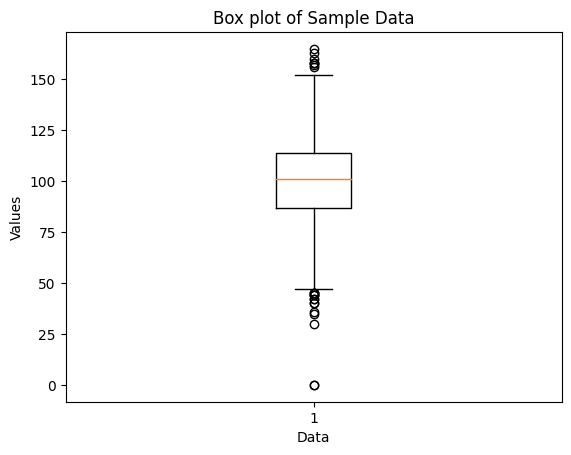

In [5]:
import pandas as pd
import matplotlib.pyplot as plt



# Extract data from DataFrame
data = df['Total day calls']

# Create a box plot
plt.boxplot(data)

# Add labels and title
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box plot of Sample Data')

# Show the plot
plt.show()


In [6]:
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
numeric_columns=['Total day calls']
z_scores=np.abs(zscore(df[numeric_columns]))
df_no_outliers=df[(z_scores<3).all(axis=1)]
print(df_no_outliers)
power_transformer = PowerTransformer()


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


     State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
3328    AZ             192        415                 No             Yes   
3329    WV              68        415                 No              No   
3330    RI              28        510                 No              No   
3331    CT             184        510                Yes              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                   

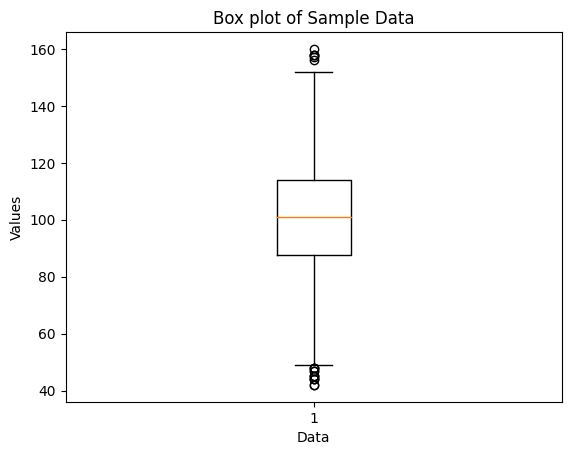

In [7]:
import pandas as pd
import matplotlib.pyplot as plt



# Extract data from DataFrame
data = df_no_outliers['Total day calls']

# Create a box plot
plt.boxplot(data)

# Add labels and title
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box plot of Sample Data')

# Show the plot
plt.show()


In [8]:
df_no_outliers['transformmed'] = power_transformer.fit_transform(df_no_outliers[['Total day calls']])
print("\nTransformed Dataset:")
print(df_no_outliers[['Total day calls']])



Transformed Dataset:
      Total day calls
0               110.0
1               123.0
2               114.0
3                71.0
4               113.0
...               ...
3328             77.0
3329             57.0
3330            109.0
3331            105.0
3332            113.0

[3324 rows x 1 columns]


C:\Users\Admin\AppData\Local\Temp\ipykernel_7120\2557774902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['transformmed'] = power_transformer.fit_transform(df_no_outliers[['Total day calls']])


(array([ 13.,  18.,  39.,  76., 106., 149., 244., 306., 365., 386., 409.,
        346., 287., 235., 134.,  90.,  64.,  38.,  13.,   6.]),
 array([-2.94379814, -2.64514299, -2.34648784, -2.04783269, -1.74917754,
        -1.45052239, -1.15186724, -0.85321209, -0.55455694, -0.2559018 ,
         0.04275335,  0.3414085 ,  0.64006365,  0.9387188 ,  1.23737395,
         1.5360291 ,  1.83468425,  2.1333394 ,  2.43199454,  2.73064969,
         3.02930484]),
 <BarContainer object of 20 artists>)

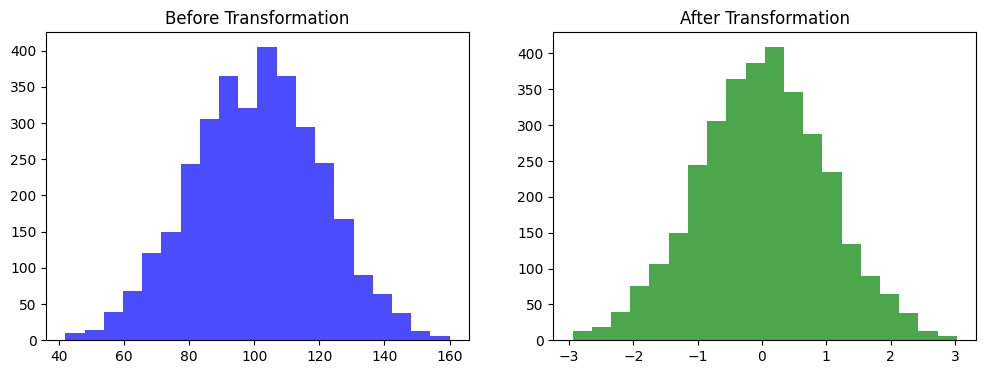

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title('Before Transformation')
plt.hist(df_no_outliers['Total day calls'], bins=20, color='blue', alpha=0.7)
plt.subplot(1, 2, 2)
plt.title('After Transformation')
plt.hist(df_no_outliers['transformmed'], bins=20, color='green', alpha=0.7)